# Sieci neuronowe i Deep Learning
# Temat 1: Wprowadzenie - perceptron

## Zadanie 1.1

Zmodyfikować definicję klasy `Perceptron` tak, aby wektor wag inicjowany był jako wektor zerowy (należy zmienić fragment `self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])`; można wykorzystać np. funkcję `np.zeros()` z biblioteki NumPy).

Dla tak zmodyfikowanej metody utworzyć kilka modeli perceptronu na danych Iris (analogicznie do omówionego przykładu) z różnymi wartościami parametru $\eta$.

Jak w tym przypadku w zależności od wartości parametru $\eta$ zmienia się postać modelu? Uzasadnić zaobserwowaną zależność.

In [6]:
import numpy as np  # Wykorzystana do przekształceń z tablicami oraz do generowania liczb losowych
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.1, n_iter=50, random_state=1):  # Metoda __init__ - konstruktor klasy
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(X.shape[1])
        self.b_ = np.float_(0.)  # Ustawienie wartości wyrazu wolnego na 0
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):  # Oblicza całkowite wejście (suma ważona cech i wyrazu wolnego)
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_  # np.dot liczy iloczyn wektorów

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)  # Jeśli wynik z net_input >= 0, przypisuje etykietę klasy 1, w p.p. 0

In [7]:
import os
from urllib.error import HTTPError
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,  # Plik nie zawiera wiersza nagłówkowego z nazwami kolumn
                     encoding='utf-8')  # Określa kodowanie znaków pliku
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    # Wczytanie danych z lokalnej ścieżki:
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):  # resolution - rozmiar kroku siatki do wizualizacji przestrzeni

    # Definiujemy listy markerów i kolorów, które będą używane do reprezentowania różnych klas na wykresie:
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # Tworzymy mapę kolorów ListedColormap na podstawie kolorów określonych w colors. 
    # cmap to obiekt, który Matplotlib używa do mapowania liczb na kolory
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Wykres obszarów decyzyjnych:
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Określamy zakresy wartości dla obu cech (-/+ 1)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))  # Tworzymy dwuwymiarową siatkę punktów do wizualizacji przestrzeni cech
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  # Liczymy predykcje dla każdego punktu siatki
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)  # Rysowanie konturu granic decyzyjnych
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())  # Ustawiono granice osi wykresu

    # Rysowanie przykładów z rozważanych klas:
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

In [9]:
# Wydzielamy dwa gatunki (setosa oraz versicolor):
y = df.iloc[0:100, 4].values  # Wybiera wiersze od 0 do 99 i 5-tą kolumnę
                              # Metoda .values konwertuje tę kolumnę na tablicę NumPy
y = np.where(y == 'Iris-setosa', 0, 1)

# Wydzielamy dwie cechy (sepal length oraz petal length):
X = df.iloc[0:100, [0, 2]].values

Eta: 0.1, Wagi: [-0.34  0.91], Wyraz wolny: -0.2


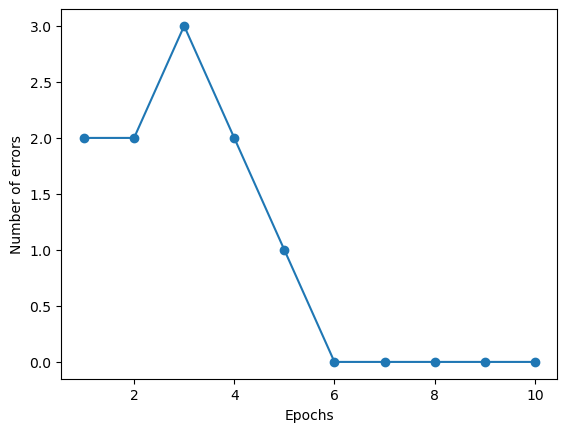

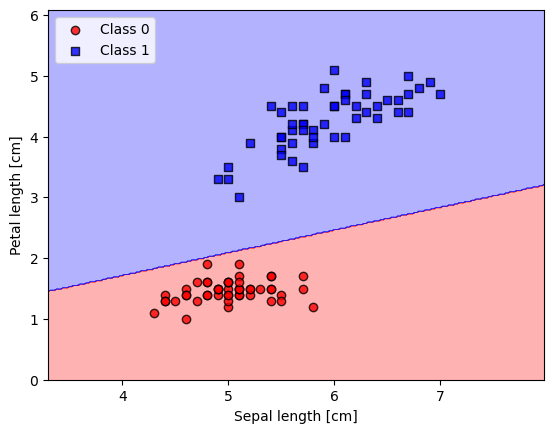

Eta: 0.2, Wagi: [-0.68  1.82], Wyraz wolny: -0.4


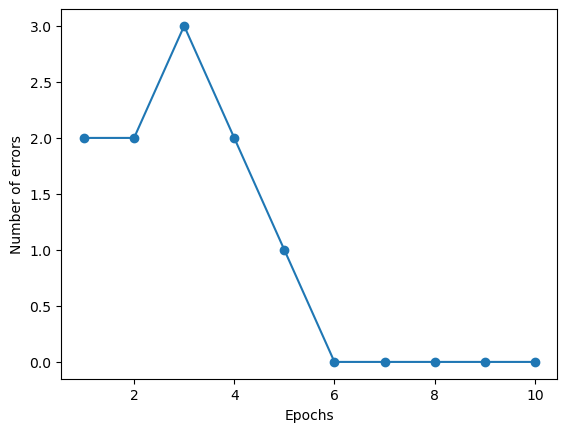

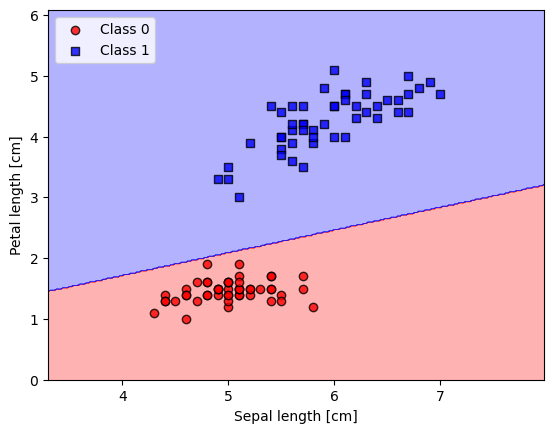

Eta: 0.4, Wagi: [-1.36  3.64], Wyraz wolny: -0.8


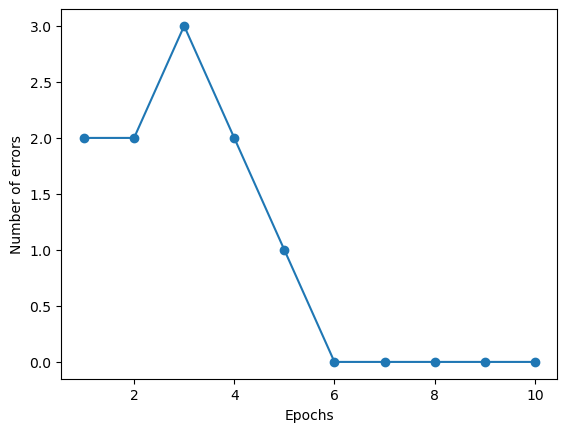

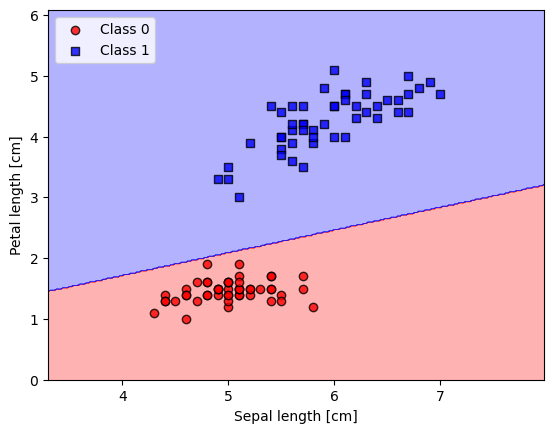

Eta: 0.6, Wagi: [-2.04  5.46], Wyraz wolny: -1.2


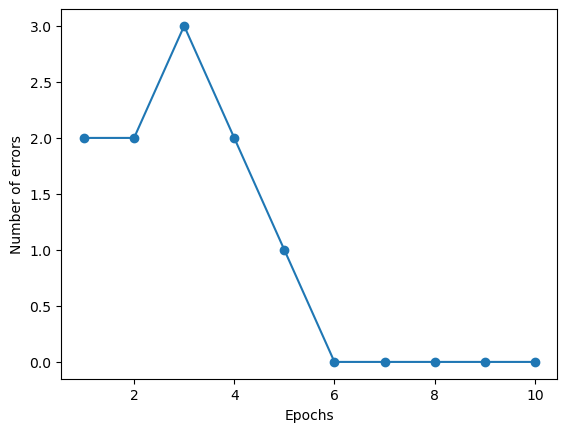

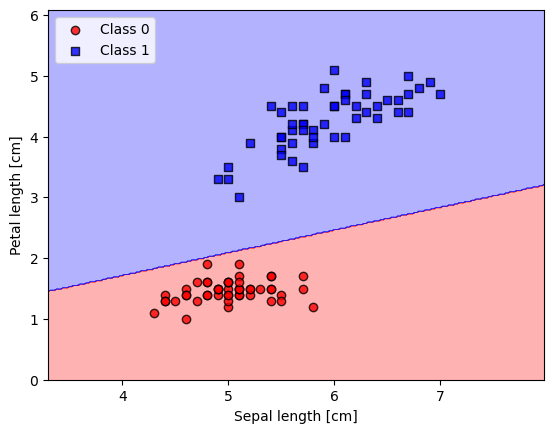

Eta: 0.8, Wagi: [-2.72  7.28], Wyraz wolny: -1.6


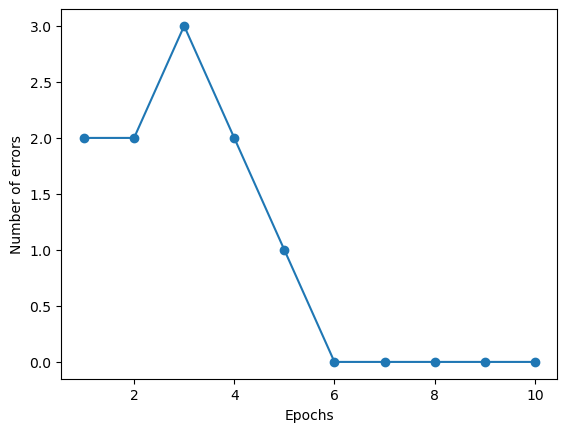

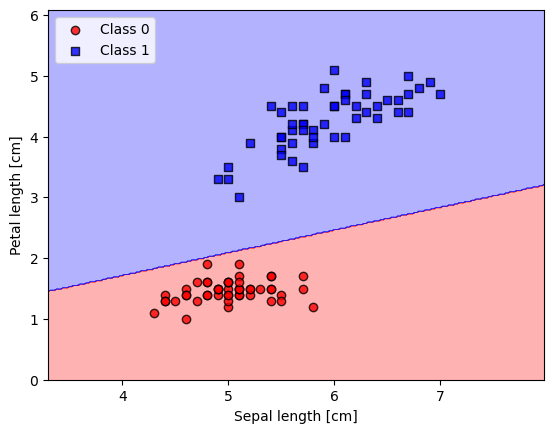

In [10]:
eta_val = [0.1,0.2,0.4,0.6,0.8]
for eta_ in eta_val:
    ppn = Perceptron(eta= eta_ , n_iter=10)
    ppn.fit(X, y)
    print(f"Eta: {eta_}, Wagi: {ppn.w_}, Wyraz wolny: {ppn.b_}")
    plt.figure()
    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of errors')  # Number of errors = Number of updates

    plt.show()
    plt.figure()
    plot_decision_regions(X, y, classifier=ppn)
    plt.xlabel('Sepal length [cm]')
    plt.ylabel('Petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

Wszystkie modele osiągają zerowy błąd po 6 epokach. Niezaleznie od wartosci $\eta$ mamy ten sam wzorzec uczenia. Wagi i wyraz wolny są proporcjonalne do wartości $\eta$ -  gdy ten parametr zwiekszymy dwukrotnie to odpowiadające wagi równie zwiększają się dwukrotnie i wyraz wolny równiez.
Wagi inicjalizowane zerami - wszystkie modele w pierwszym kroku podejmą taką samą decyzję klasyfikacyjną; zatem w  $\Delta w_j$ zmienia się tylko wielkość aktualizacji proporcjonalnie do $\eta$, a sama $\eta$ nie wpływa na to, czy dane wejściowe zostaną sklasyfikowanie poprawnie, czy nie w danym momencie.


## Zadanie 1.2

Sprawdzić, czy zaobserwowany w zadaniu 1.1 efekt znika, gdy wagi inicjalizowane są przez wartości niezerowe.

In [11]:
import numpy as np  # Wykorzystana do przekształceń z tablicami oraz do generowania liczb losowych
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.1, n_iter=50, random_state=1):  # Metoda __init__ - konstruktor klasy
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)  # Generator liczb losowych NumPy, zainicjalizowany przez użytkownika
        self.w_ = rgen.normal(loc=0.0, scale=0.15, size=X.shape[1])  # Inicjalizacja wag z rozkładu normalnego
        self.b_ = np.float_(0.)  # Ustawienie wartości wyrazu wolnego na 0
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):  # Oblicza całkowite wejście (suma ważona cech i wyrazu wolnego)
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_  # np.dot liczy iloczyn wektorów

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)  # Jeśli wynik z net_input >= 0, przypisuje etykietę klasy 1, w p.p. 0

Eta: 0.1, Wagi: [-0.43539215  0.95002358], Wyraz wolny: -0.30000000000000004


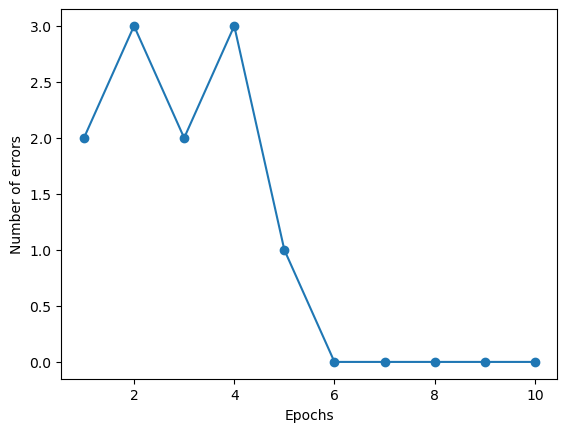

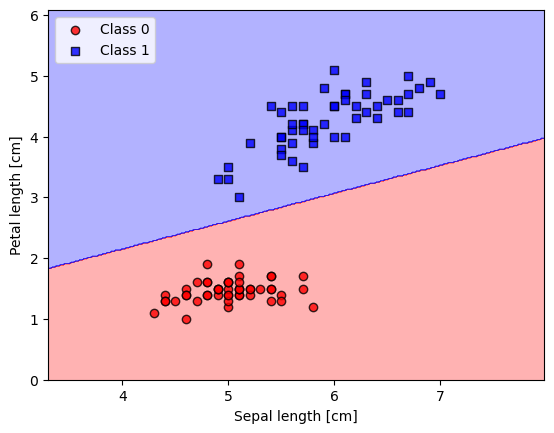

Eta: 0.2, Wagi: [-0.59539215  1.48002358], Wyraz wolny: -0.4


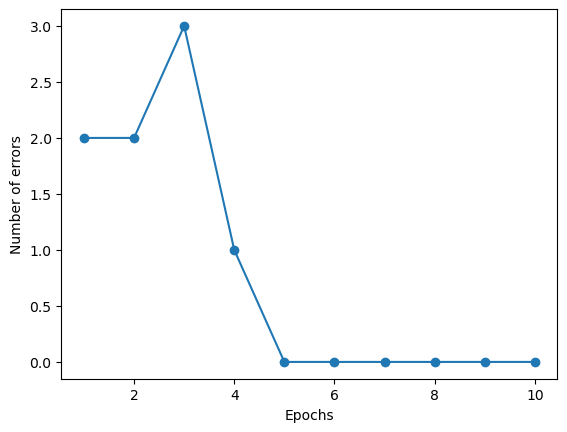

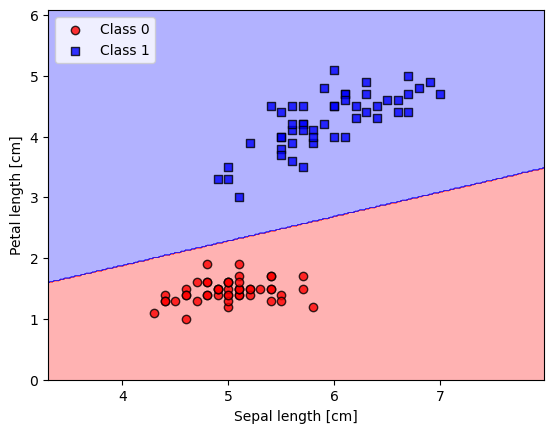

Eta: 0.4, Wagi: [-1.45539215  2.90002358], Wyraz wolny: -0.8


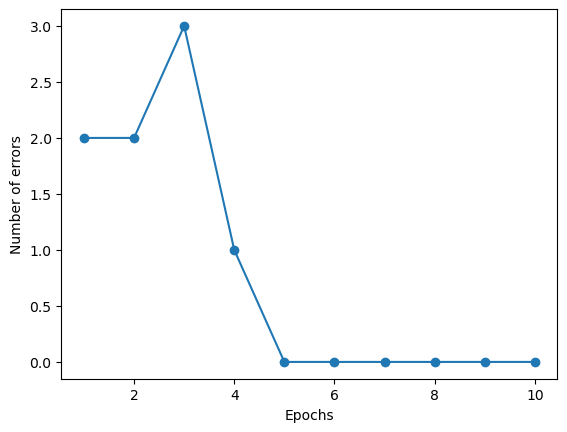

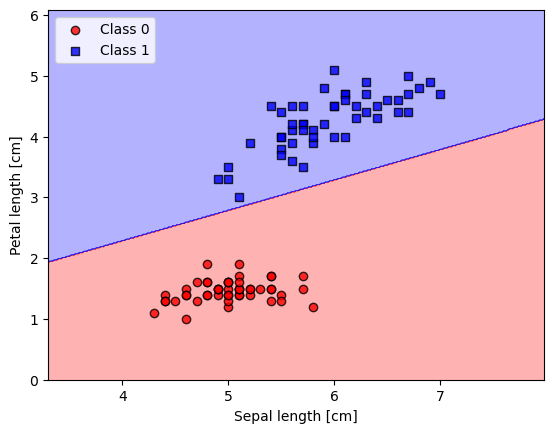

Eta: 0.6, Wagi: [-2.31539215  5.28002358], Wyraz wolny: -1.2


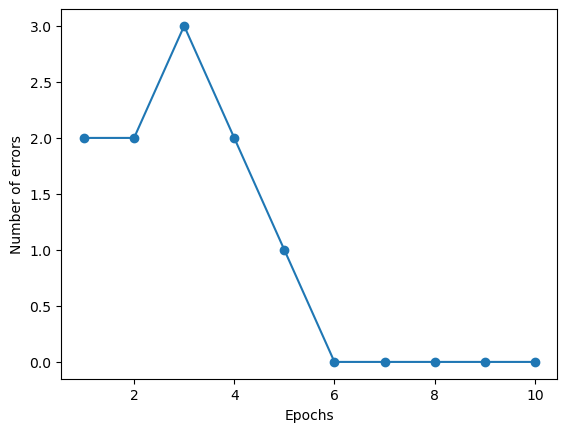

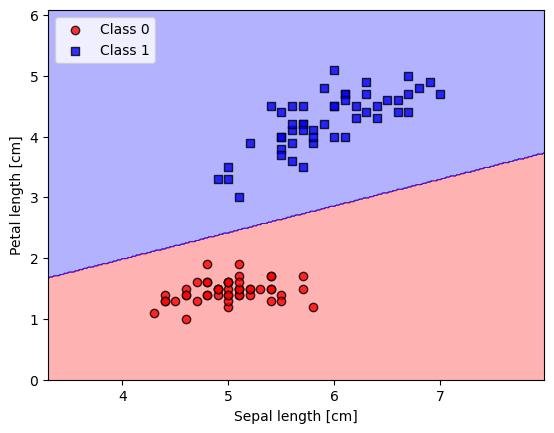

Eta: 0.8, Wagi: [-3.17539215  7.02002358], Wyraz wolny: -1.6


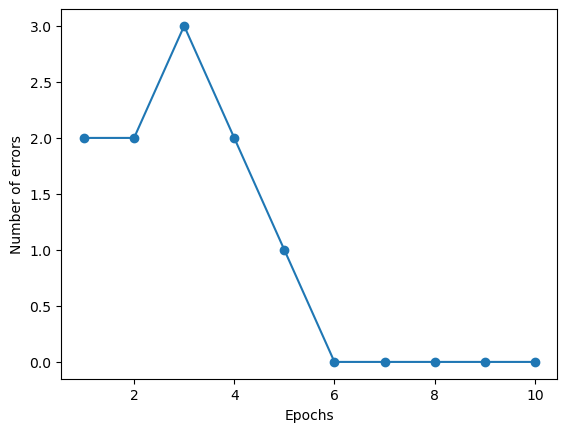

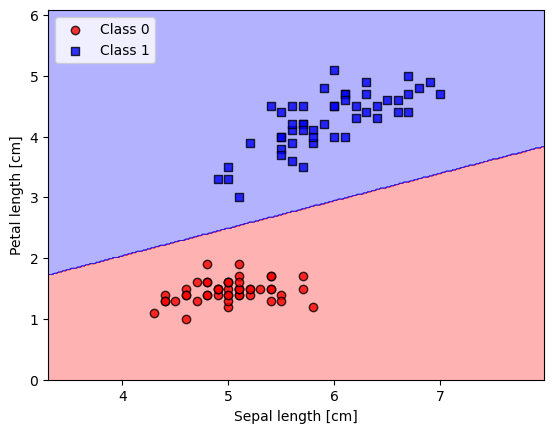

In [12]:
eta_val = [0.1,0.2,0.4,0.6,0.8]
for eta_ in eta_val:
    ppn = Perceptron(eta= eta_ , n_iter=10, random_state = 0)
    ppn.fit(X, y)
    print(f"Eta: {eta_}, Wagi: {ppn.w_}, Wyraz wolny: {ppn.b_}")
    plt.figure()
    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of errors')  # Number of errors = Number of updates

    plt.show()
    plt.figure()
    plot_decision_regions(X, y, classifier=ppn)
    plt.xlabel('Sepal length [cm]')
    plt.ylabel('Petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

Znika

## Zadanie 1.3*

Sprawdzić ponadto, jak zachowywała będzie się metoda perceptronu, gdy zmieniali będziemy (niezerowe) wartości początkowe wag.

Jaki ogólny wniosek na temat zbieżności metody perceptronu można wyciągnąć na podstawie przeprowadzonych eksperymentów?

In [13]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.1, n_iter=50, random_state=1, scale = 0.01):  # Metoda __init__ - konstruktor klasy
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.scale = scale
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)  # Generator liczb losowych NumPy, zainicjalizowany przez użytkownika
        self.w_ = rgen.normal(loc=0.0, scale = self.scale, size=X.shape[1])  # Inicjalizacja wag z rozkładu normalnego
        self.b_ = np.float_(0.)  # Ustawienie wartości wyrazu wolnego na 0
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):  # Oblicza całkowite wejście (suma ważona cech i wyrazu wolnego)
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_  # np.dot liczy iloczyn wektorów

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)  # Jeśli wynik z net_input >= 0, przypisuje etykietę klasy 1, w p.p. 0
    

Eta: 0.42, Wagi: [-0.37747654  2.11157208], Wyraz wolny: -4.2, Zbieznosc w epoce: 4


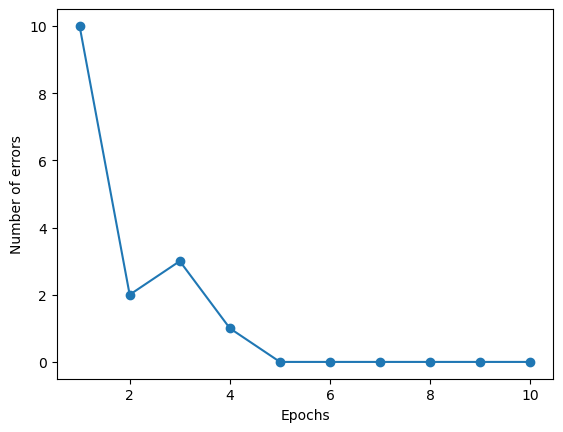

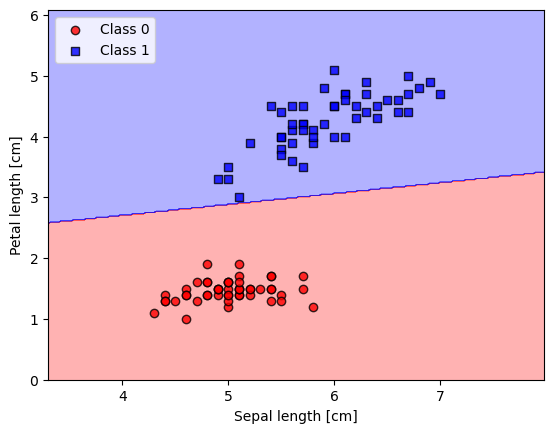

Eta: 0.42, Wagi: [-0.83994765  1.99615721], Wyraz wolny: -0.84, Zbieznosc w epoce: 3


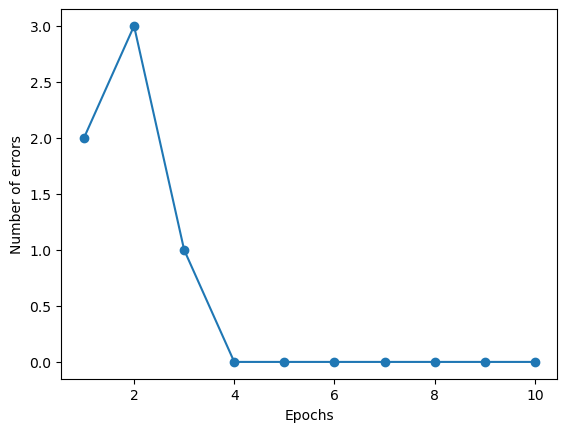

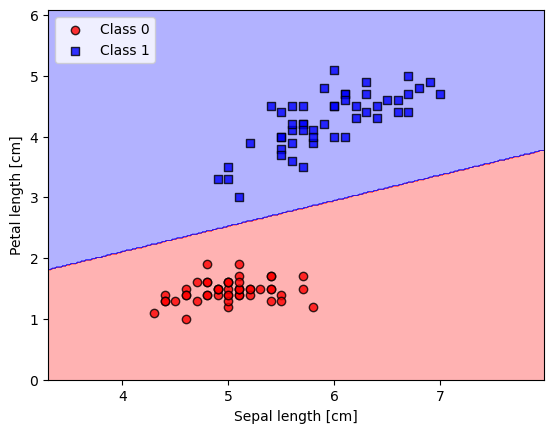

Eta: 0.42, Wagi: [-1.62959477  3.69401572], Wyraz wolny: -0.84, Zbieznosc w epoce: 5


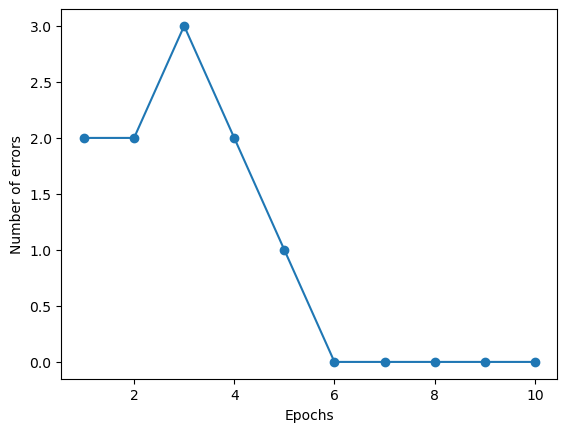

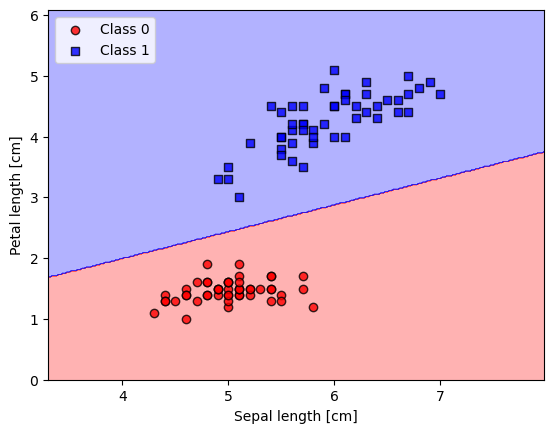

Eta: 0.42, Wagi: [-1.57835948  3.91000157], Wyraz wolny: -0.84, Zbieznosc w epoce: 5


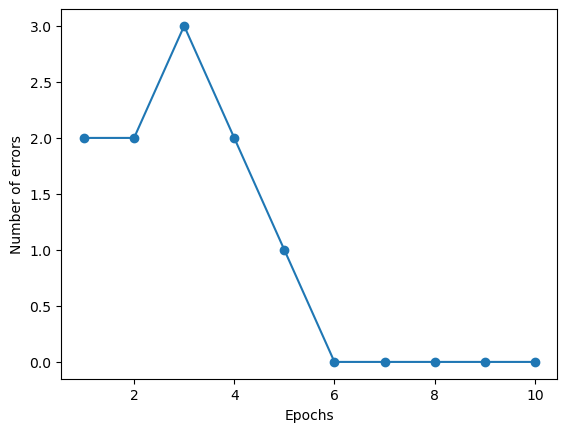

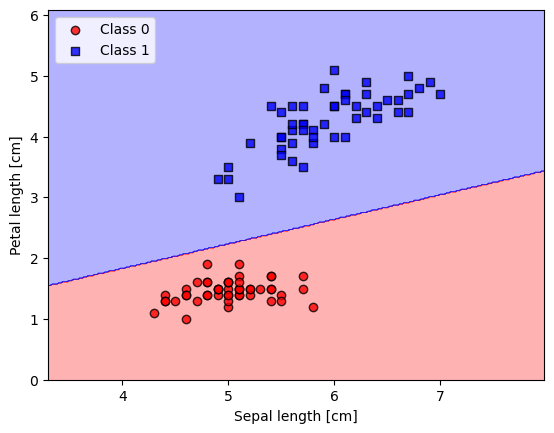

Eta: 0.42, Wagi: [-1.42623595  3.82240016], Wyraz wolny: -0.84, Zbieznosc w epoce: 5


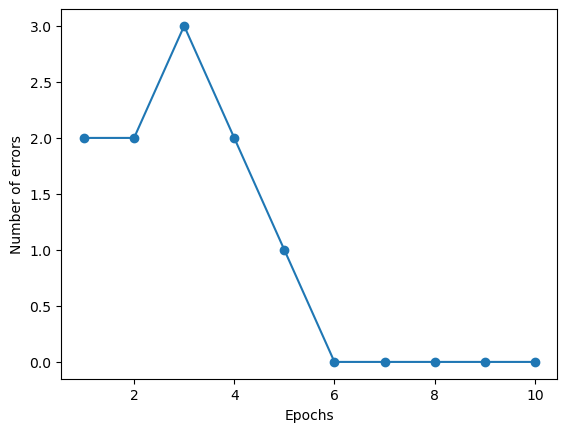

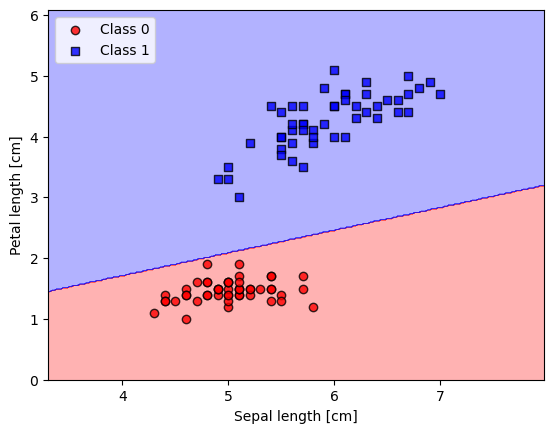

In [14]:
eta = 0.420
scale_vals = [10 ** (-i) for i in range(-1, 4)]
for scale in scale_vals:
    ppn = Perceptron(eta = eta, n_iter = 10, random_state = 0, scale = scale)
    ppn.fit(X, y)
    conv = next((i for i, e in enumerate(ppn.errors_) if e == 0), "Nie zbiega")
    print(f"Eta: {eta}, Wagi: {ppn.w_}, Wyraz wolny: {ppn.b_}, Zbieznosc w epoce: {conv}")
    plt.figure()
    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of errors')  # Number of errors = Number of updates

    plt.show()
    plt.figure()
    plot_decision_regions(X, y, classifier=ppn)
    plt.xlabel('Sepal length [cm]')
    plt.ylabel('Petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

Na podstawie przeprowadzonych eksperymentów stwierdzamy, ze metoda perceptronu zbiega, gdy dane sa liniowo seperowalne; perceptron zawsze zbiegnie do rozwiazania, niezaleznie od wartosci wag, czy wartosci $\eta$. Jedyna roznica dotyczy epok, potrzebnych do osiagniecia zbieznosci.